This is needed if you do this using Google Colab and your data is on GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Set Up

In [2]:
import pandas as pd
import numpy as np
import pprint
import random
import nltk
nltk.download('punkt')
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Data Preparation

In [3]:
dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Octopus2/JIRA_OPEN_DATA_ZOOKEEPER.csv")
df = dataset[["title", "description", "priority"]]
df['features'] = df['title'] + df['description']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
random.seed(1)

Remove all the stuff we don't want in the description

In [0]:
df1 = df.copy()

In [0]:
df1.features = df1.features.str.replace(r"[\n\r\t]+", " ")

In [0]:
df1.features = df1.features.str.replace(r"([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})", " ")
df1.features = df1.features.str.replace(r"((http[s]?|ftp):\/)?\/?([^:\/\s]+)((\/\w+)*\/)([\w\-\.]+[^#?\s]+)(.*)?(#[\w\-]+)?", " ")

In [0]:
df1.features = df1.features.str.replace(r"([0-9]+)", " ")

In [9]:
df1.head()

title  ...                                           features
0  Quota is not correctly rehydrated on snapshot ...  ...  Quota is not correctly rehydrated on snapshot ...
1  bookkeeper create calls completion too many times  ...  bookkeeper create calls completion too many ti...
2           test -e not available on solaris /bin/sh  ...                 test -e not available on solaris  
3                    CnxManagerTest failed on hudson  ...  CnxManagerTest failed on hudsonIt timed out ac...
4                                          FLE test.  ...       FLE test.fast leader election test failing .

[5 rows x 4 columns]

Now we want to vectorize the description. Here I'm first using the count vectorizer to see if the feature names generated are correct then I'll use the same vectorizer parameters for the TF-IDF vectorizer

In [10]:
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), min_df=2)
text_counts = cv.fit_transform(df1.features)
text_counts.toarray()
print(cv.get_feature_names())

['able', 'abort', 'ac', 'accept', 'access', 'accessive', 'accessive jar', 'according', 'acl', 'acls', 'action', 'actual', 'actual log', 'actually', 'add', 'add locking', 'add tests', 'added', 'added zookeeper', 'adding', 'address', 'addresses', 'addresses colon', 'adds', 'admin', 'advances', 'affect', 'affects', 'allocated', 'allow', 'allow ipv', 'allowing', 'allows', 'ant', 'ant package', 'ant test', 'apache', 'apache bookkeeper', 'apache jute', 'apache license', 'apache zookeeper', 'api', 'api docs', 'api does', 'apparently', 'appears', 'append', 'append stringbuilder', 'application', 'application calls', 'applied', 'applies', 'appropriate', 'argument', 'arguments', 'array', 'arraylist', 'artifact', 'artifacts', 'assertion', 'assertionfailederror', 'assumes', 'async', 'asynchammertest', 'asynchronous', 'asynchronous version', 'atleast', 'attach', 'attach simple', 'attach test', 'attached', 'attached patch', 'attaching', 'attachment', 'attempt', 'attempts', 'attribute', 'audit', 'auth

In [11]:
cv1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), min_df=2)
text_tfidf = cv1.fit_transform(df1.features)
text_tfidf.toarray()
print(cv1.get_feature_names())

['able', 'abort', 'ac', 'accept', 'access', 'accessive', 'accessive jar', 'according', 'acl', 'acls', 'action', 'actual', 'actual log', 'actually', 'add', 'add locking', 'add tests', 'added', 'added zookeeper', 'adding', 'address', 'addresses', 'addresses colon', 'adds', 'admin', 'advances', 'affect', 'affects', 'allocated', 'allow', 'allow ipv', 'allowing', 'allows', 'ant', 'ant package', 'ant test', 'apache', 'apache bookkeeper', 'apache jute', 'apache license', 'apache zookeeper', 'api', 'api docs', 'api does', 'apparently', 'appears', 'append', 'append stringbuilder', 'application', 'application calls', 'applied', 'applies', 'appropriate', 'argument', 'arguments', 'array', 'arraylist', 'artifact', 'artifacts', 'assertion', 'assertionfailederror', 'assumes', 'async', 'asynchammertest', 'asynchronous', 'asynchronous version', 'atleast', 'attach', 'attach simple', 'attach test', 'attached', 'attached patch', 'attaching', 'attachment', 'attempt', 'attempts', 'attribute', 'audit', 'auth

Train test split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(text_tfidf, df1.priority, test_size=0.2)

(array([189.,   0.,  46.,   0.,   0.,   9.,   0.,  57.,   0.,  56.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

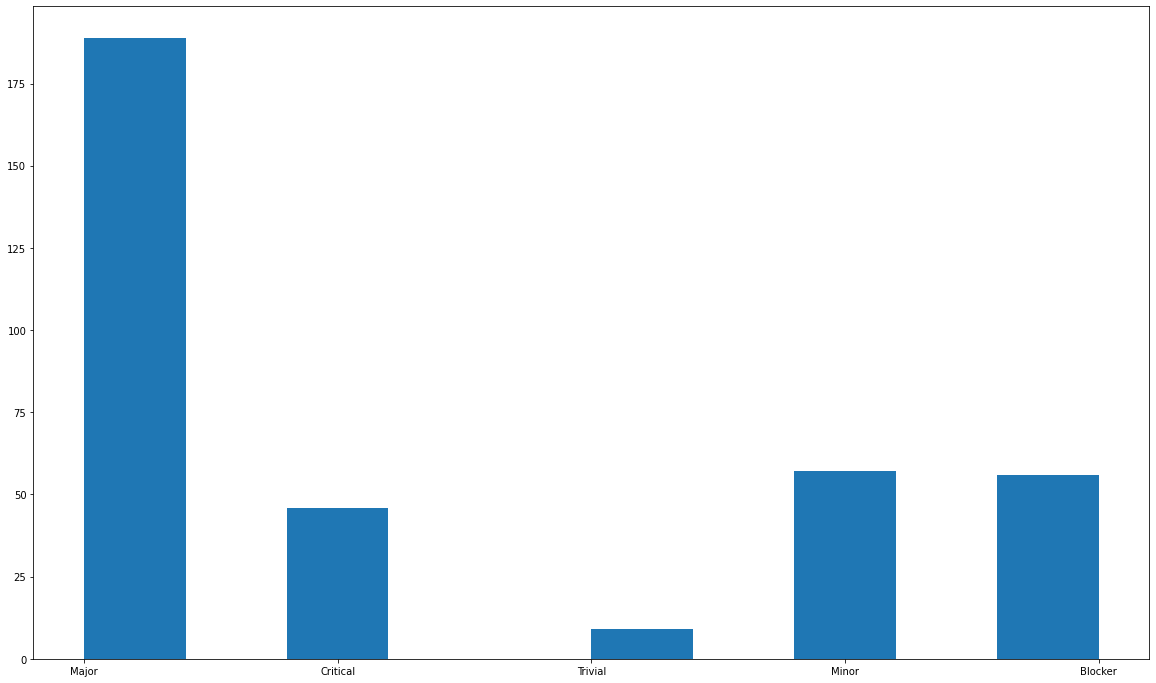

In [14]:
plt.figure(figsize=(20,12))
plt.hist(Y_train)

(array([17.,  0., 21.,  0.,  0., 35.,  0.,  4.,  0., 13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

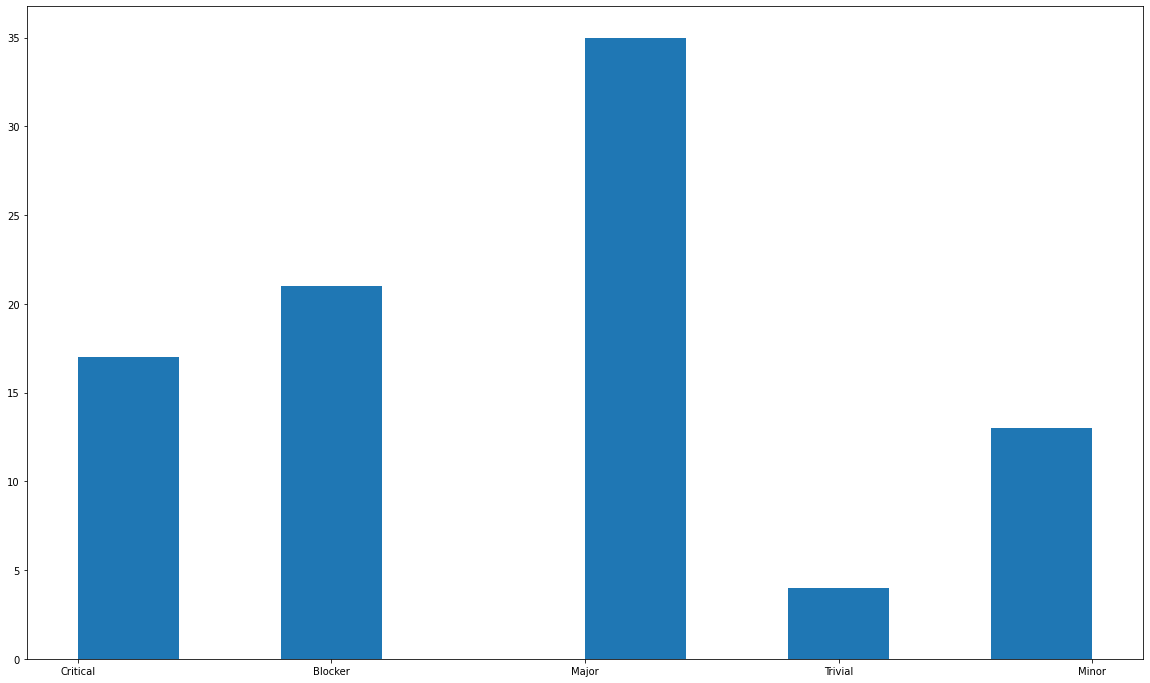

In [15]:
plt.figure(figsize=(20,12))
plt.hist(Y_test)

Following examples found in 

*   https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
*   https://www.datacamp.com/community/tutorials/random-forests-classifier-python

### Naive Bayes Classifier

In [16]:
nb_clf = MultinomialNB().fit(X_train, Y_train)
nb_predict = nb_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, nb_predict))
print(metrics.classification_report(Y_test, nb_predict))

Accuracy: 0.3888888888888889
              precision    recall  f1-score   support

     Blocker       0.00      0.00      0.00        21
    Critical       0.00      0.00      0.00        17
       Major       0.39      1.00      0.56        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.39        90
   macro avg       0.08      0.20      0.11        90
weighted avg       0.15      0.39      0.22        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Classifier

In [17]:
log_clf = LogisticRegression().fit(X_train, Y_train)
log_predict = log_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, log_predict))
print(metrics.classification_report(Y_test, log_predict))

Accuracy: 0.3888888888888889
              precision    recall  f1-score   support

     Blocker       0.00      0.00      0.00        21
    Critical       0.00      0.00      0.00        17
       Major       0.39      1.00      0.56        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.39        90
   macro avg       0.08      0.20      0.11        90
weighted avg       0.15      0.39      0.22        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine Classifier

In [18]:
svm_clf = LinearSVC().fit(X_train, Y_train)
svm_predict = svm_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, svm_predict))
print(metrics.classification_report(Y_test, svm_predict))

Accuracy: 0.3888888888888889
              precision    recall  f1-score   support

     Blocker       0.20      0.05      0.08        21
    Critical       0.60      0.18      0.27        17
       Major       0.41      0.89      0.56        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.39        90
   macro avg       0.24      0.22      0.18        90
weighted avg       0.32      0.39      0.29        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [19]:
rf_clf = RandomForestClassifier().fit(X_train, Y_train)
rf_predict = rf_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, rf_predict))
print(metrics.classification_report(Y_test, rf_predict))

Accuracy: 0.37777777777777777
              precision    recall  f1-score   support

     Blocker       0.00      0.00      0.00        21
    Critical       0.50      0.12      0.19        17
       Major       0.39      0.91      0.54        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.38        90
   macro avg       0.18      0.21      0.15        90
weighted avg       0.24      0.38      0.25        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter tuning 

Following the example found here https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [21]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [23]:
best_rand = rf_random.best_estimator_
rf1_predict = best_rand.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, rf1_predict))
print(metrics.classification_report(Y_test, rf1_predict))

Accuracy: 0.37777777777777777
              precision    recall  f1-score   support

     Blocker       0.00      0.00      0.00        21
    Critical       0.00      0.00      0.00        17
       Major       0.38      0.97      0.55        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.38        90
   macro avg       0.08      0.19      0.11        90
weighted avg       0.15      0.38      0.21        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 25, 30, 35],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 8],
    'n_estimators': [300, 350, 400, 450, 500]
}

In [0]:
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.5min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [27]:
best_grid = grid_search.best_estimator_
rf2_predict = best_grid.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, rf2_predict))
print(metrics.classification_report(Y_test, rf2_predict))
#grid_accuracy = evaluate(best_grid, X_test, Y_test)

Accuracy: 0.37777777777777777
              precision    recall  f1-score   support

     Blocker       0.00      0.00      0.00        21
    Critical       0.00      0.00      0.00        17
       Major       0.38      0.97      0.55        35
       Minor       0.00      0.00      0.00        13
     Trivial       0.00      0.00      0.00         4

    accuracy                           0.38        90
   macro avg       0.08      0.19      0.11        90
weighted avg       0.15      0.38      0.21        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
